In [61]:
import pandas as pd
from tensorflow import keras
from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from keras.callbacks import EarlyStopping

#### Functions

In [17]:
columns_teste

['DATEPRD',
 'WELL_BORE_CODE',
 'NPD_WELL_BORE_CODE',
 'NPD_WELL_BORE_NAME',
 'NPD_FIELD_CODE',
 'NPD_FIELD_NAME',
 'NPD_FACILITY_CODE',
 'NPD_FACILITY_NAME',
 'ON_STREAM_HRS',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_CHOKE_UOM',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_OIL_VOL',
 'BORE_GAS_VOL',
 'BORE_WAT_VOL',
 'BORE_WI_VOL',
 'FLOW_KIND',
 'WELL_TYPE']

In [18]:
df = pd.read_csv('Volve production data.csv', sep =';', decimal = ',' )
columns_df = list(df2)
display(columns_df)

filtro = df.WELL_BORE_CODE == 'NO 15/9-F-1 C'
df2 = df.loc[filtro]

data = pd.DataFrame()
columns = ['AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'AVG_CHOKE_SIZE_P','ON_STREAM_HRS']

for element in columns:
    data[element] = df2[element].astype(float)
    
data.dropna(inplace = True)
data = data.reindex(columns = ['BORE_OIL_VOL','AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE','AVG_CHOKE_SIZE_P','ON_STREAM_HRS','BORE_GAS_VOL', 'BORE_WAT_VOL'])
print(type(data))

data

['DATEPRD',
 'WELL_BORE_CODE',
 'NPD_WELL_BORE_CODE',
 'NPD_WELL_BORE_NAME',
 'NPD_FIELD_CODE',
 'NPD_FIELD_NAME',
 'NPD_FACILITY_CODE',
 'NPD_FACILITY_NAME',
 'ON_STREAM_HRS',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_CHOKE_UOM',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_OIL_VOL',
 'BORE_GAS_VOL',
 'BORE_WAT_VOL',
 'BORE_WI_VOL',
 'FLOW_KIND',
 'WELL_TYPE']

<class 'pandas.core.frame.DataFrame'>


,BORE_OIL_VOL,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,ON_STREAM_HRS,BORE_GAS_VOL,BORE_WAT_VOL
0,0.0,0.000,0.000,0.00000,0.0,0.0,0.0
4,0.0,310.376,96.876,1.21599,0.0,0.0,0.0
5,0.0,303.501,96.923,3.08702,0.0,0.0,0.0
6,0.0,303.535,96.959,1.96237,0.0,0.0,0.0
7,0.0,303.782,96.969,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...
741,0.0,270.268,101.198,0.00000,0.0,0.0,0.0
742,0.0,276.869,101.231,0.00000,0.0,0.0,0.0
743,0.0,282.105,101.178,0.26519,0.0,0.0,0.0
744,0.0,285.096,101.131,0.00000,0.0,0.0,0.0


In [19]:
def create_dataset(timestamp, data):
    X = []
    y = []
    for i in range(timestamp,len(data)):
        
        data_X = data.iloc[:,1:-1]       
        X.append(data[i-timestamp:i,:])
        y.append(data.iloc[i,0])
        
        if i <= timestamp:
            print(len(X))
            print(X)
            print(y)
        
    return np.array(X), np.array(y)

In [20]:
#NÃO RODAR!
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(np.array(data))
df_normalized = pd.DataFrame(scaler.fit_transform(np.array(data)), columns = columns)
df_normalized = df_normalized.reindex(columns = ['BORE_OIL_VOL','AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE','AVG_CHOKE_SIZE_P','ON_STREAM_HRS','BORE_GAS_VOL', 'BORE_WAT_VOL'])



display(df_normalized)

,BORE_OIL_VOL,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,ON_STREAM_HRS,BORE_GAS_VOL,BORE_WAT_VOL
0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.892850,0.0,0.988865,0.0,0.0,0.012986,0.0
2,0.893283,0.0,0.966961,0.0,0.0,0.032969,0.0
3,0.893615,0.0,0.967069,0.0,0.0,0.020958,0.0
4,0.893707,0.0,0.967856,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...
738,0.932683,0.0,0.861080,0.0,0.0,0.000000,0.0
739,0.932987,0.0,0.882111,0.0,0.0,0.000000,0.0
740,0.932499,0.0,0.898793,0.0,0.0,0.002832,0.0
741,0.932066,0.0,0.908322,0.0,0.0,0.000000,0.0


In [21]:
look_back = 1
test_size = 0.2

train_index = int(data.shape[0]*(1-test_size))

train_data = df_normalized.iloc[:train_index,:].values
test_data = df_normalized.iloc[train_index:,:].values

# split into input and outputs
train_X, train_y = train_data[:, 1:], train_data[:, 0]
test_X, test_y = test_data[:, 1:], test_data[:, 0]

train_X = train_X.reshape((train_X.shape[0], look_back, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], look_back, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

#_, y_expected = create_dataset(look_back, data.iloc[train_index:-1:0].values)

#print(y_expected.shape)

(594, 1, 6) (594,) (149, 1, 6) (149,)


In [22]:
train_X

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ]],

       [[0.        , 0.98886485, 0.        , 0.        , 0.01298643,
         0.        ]],

       [[0.        , 0.96696095, 0.        , 0.        , 0.0329685 ,
         0.        ]],

       ...,

       [[0.31237113, 0.77855234, 0.0891286 , 0.00104137, 0.64788628,
         0.96      ]],

       [[0.31340206, 0.76411647, 0.08870633, 0.0010444 , 0.64740259,
         0.96      ]],

       [[0.31030928, 0.75219756, 0.08754319, 0.91826438, 0.64733371,
         0.96      ]]])

scaler_target = MinMaxScaler(feature_range=(0, 1))
scaler_target = scaler_target.fit(np.array(data[:,0]))

# transform train
train_data_y = np.array(train_data)
test_data_y = data.iloc[train_index:-1,:].values

train_data_y = train_data_y.reshape(-1, 1)
train_scaled = scaler_target.transform(train_data_y)

# transform test
test_data_y = test_data_y.reshape(-1, 1)
test_scaled = scaler_target.transform(test_data_y)

trainX, trainy = create_dataset(look_back, train_data)
testX, testy = create_dataset(look_back, test_data)

print(trainX.shape)

train_data = np.reshape(trainX, (trainX.shape[0], look_back, 1))

test_data = np.reshape(testX, (testX.shape[0], look_back, 1))
print(train_data.shape)
print(test_data.shape)

In [25]:
model = Sequential()
model.add(LSTM(40, return_sequences = True, input_shape = (train_X.shape[1],train_X.shape[2])))
model.add(LSTM(40, return_sequences = False))
model.add(Dense(20, activation = 'tanh'))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 40)             7520      
                                                                 
 lstm_3 (LSTM)               (None, 40)                12960     
                                                                 
 dense_2 (Dense)             (None, 20)                820       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 21,321
Trainable params: 21,321
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
534/534 - 5s - loss: 0.0118 - val_loss: 0.0012 - 5s/epoch - 10ms/step
Epoch 2/10
534/534 - 1s - loss: 0.0024 - val_loss: 0.0011 - 1s/epoch - 2ms/step
Epoch 3/10
534/534 - 1s - loss: 0.0024 - val_loss: 9.8619e-04 - 1s/epoch - 2ms/step
Epoch 4/10
534/534 - 1s - loss: 0.0023 - val_loss: 9.1017e-04 - 1s/epoch - 2ms/step
Epoch 5/10
534/534 - 1s - loss: 0.0023 - val_loss: 8.4032e-04 - 1s/epoch - 2ms/step
Epoch 6/10
534/534 - 1s - loss: 0.0022 - val_loss: 7.7604e-04 - 1s/epoch - 2ms/step
Epoch 7/10
534/534 - 1s - loss: 0.0022 - val_loss: 7.1685e-04 - 1s/epoch - 2ms/step
Epoch 8/10
534/534 - 1s - loss: 0.0022 - val_loss: 6.6232e-04 - 1s/epoch - 2ms/step
Epoch 9/10
534/534 - 1s - loss: 0.0021 - val_loss: 6.1208e-04 - 1s/epoch - 2ms/step
Epoch 10/10
534/534 - 1s - loss: 0.0021 - val_loss: 5.6581e-04 - 1s/epoch - 2ms/step


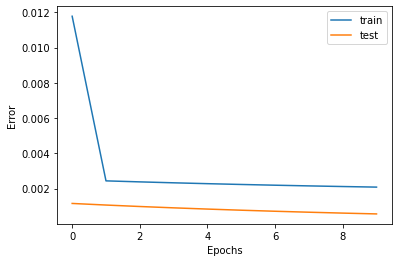

In [26]:
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

history  = model.fit(train_X,train_y, batch_size = 1, epochs = 10,  validation_split = 0.1, verbose=2, shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

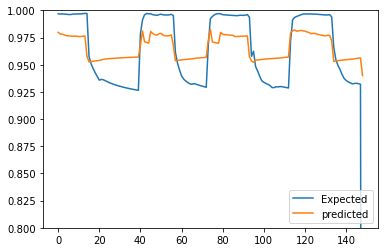

NameError: name 'RMSE' is not defined

In [32]:
y_pred = model.predict(test_X)

#y_pred = scaler_target.inverse_transform(y_pred)

#RMSE = MSE(y_expected,y_pred)**0.5

plt.plot(test_y, label='Expected')
plt.plot(y_pred, label='predicted')
plt.ylim(0.8,1)
plt.legend(loc ='lower right')

plt.show()


print(RMSE)

In [68]:
model2 = Sequential()
model2.add(Dense(16, input_shape = (train_X.shape[1],train_X.shape[2])))
model2.add(Dense(8, activation = 'tanh'))
model2.add(Dense(2, activation = 'tanh'))
model2.add(Dense(8, activation = 'tanh'))
model2.add(Dense(16, activation = 'tanh'))
model2.add(LSTM(40, return_sequences = True))
model2.add(LSTM(40, return_sequences = False))
model2.add(Dense(20, activation = 'tanh'))
model2.add(Dense(1))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1, 16)             112       
                                                                 
 dense_19 (Dense)            (None, 1, 8)              136       
                                                                 
 dense_20 (Dense)            (None, 1, 2)              18        
                                                                 
 dense_21 (Dense)            (None, 1, 8)              24        
                                                                 
 dense_22 (Dense)            (None, 1, 16)             144       
                                                                 
 lstm_6 (LSTM)               (None, 1, 40)             9120      
                                                                 
 lstm_7 (LSTM)               (None, 40)               

Epoch 1/50
534/534 - 6s - loss: 0.0018 - val_loss: 2.3095e-04 - 6s/epoch - 11ms/step
Epoch 2/50
534/534 - 1s - loss: 0.0018 - val_loss: 2.0993e-04 - 1s/epoch - 3ms/step
Epoch 3/50
534/534 - 1s - loss: 0.0018 - val_loss: 1.9095e-04 - 1s/epoch - 3ms/step
Epoch 4/50
534/534 - 1s - loss: 0.0018 - val_loss: 1.7410e-04 - 1s/epoch - 2ms/step
Epoch 5/50
534/534 - 1s - loss: 0.0017 - val_loss: 1.5941e-04 - 1s/epoch - 3ms/step
Epoch 6/50
534/534 - 1s - loss: 0.0017 - val_loss: 1.4685e-04 - 1s/epoch - 3ms/step
Epoch 7/50
534/534 - 1s - loss: 0.0017 - val_loss: 1.3633e-04 - 1s/epoch - 3ms/step
Epoch 8/50
534/534 - 1s - loss: 0.0017 - val_loss: 1.2773e-04 - 1s/epoch - 3ms/step
Epoch 9/50
534/534 - 2s - loss: 0.0017 - val_loss: 1.2088e-04 - 2s/epoch - 3ms/step
Epoch 10/50
534/534 - 1s - loss: 0.0017 - val_loss: 1.1561e-04 - 1s/epoch - 2ms/step
Epoch 11/50
534/534 - 1s - loss: 0.0017 - val_loss: 1.1172e-04 - 1s/epoch - 2ms/step
Epoch 12/50
534/534 - 1s - loss: 0.0017 - val_loss: 1.0902e-04 - 1s/epoch

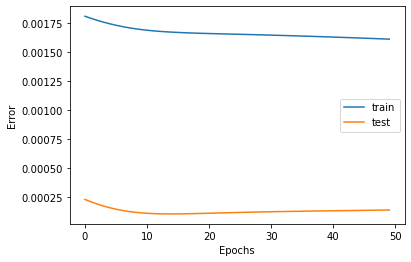

In [71]:
model2.compile(optimizer = 'sgd', loss = 'mean_squared_error')

early_stopping_monitor = EarlyStopping(patience = 15)

history  = model2.fit(train_X,train_y, batch_size = 1, epochs = 50,
                      validation_split = 0.1, verbose=2, shuffle=False
                     #,callbacks = [early_stopping_monitor]
                     )

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

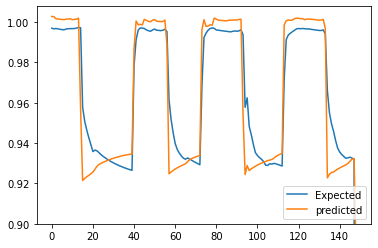

0.07334411812289908


In [72]:
y_pred = model2.predict(test_X)
y_pred_train = model2.predict(train_X)

#y_pred = scaler_target.inverse_transform(y_pred)

RMSE = MSE(test_y,y_pred)**0.5

plt.plot(test_y, label='Expected')
plt.plot(y_pred, label='predicted')
plt.ylim(0.9,y_pred.max()*1.005)
plt.legend(loc ='lower right')

plt.show()


print(RMSE)

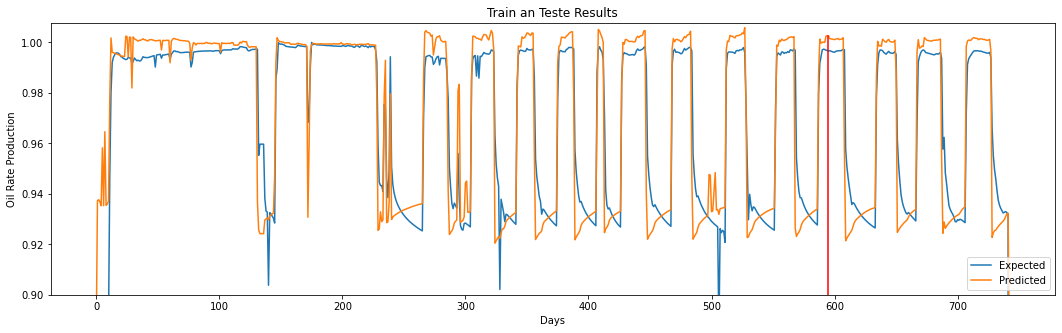

In [73]:
x_axis = np.arange(0, data.shape[0])
y_plot = np.linspace(0, y_pred.max(), num = data.shape[0])
x_plot = list(map(lambda x: train_index+1, x_axis))

y_pred_train = model2.predict(train_X)

predicitions = np.concatenate((y_pred_train, y_pred), axis=0)

fig = plt.figure(figsize=(18, 5))
plt.plot(x_axis, df_normalized.iloc[:,0], label='Expected')
plt.plot(x_axis, predicitions, label='Predicted')
plt.title('Train an Teste Results')
plt.ylabel('Oil Rate Production')
plt.xlabel('Days')
#plt.annotate(f'r-squared = {R2_treinamento1}', (0,0.9))
plt.ylim(0.9,y_pred.max()*1.005)
#fig.add_artist(lines.Line2D([524, 200], [524, 320]))
plt.plot(x_plot, y_plot, 'r', linestyle='-')
plt.legend(loc ='lower right')